# Home Assignment No. 2: Part 2 (Practice)
To solve this task, you will write a lot of code to try several deep learning methods.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [pytorch](https://pytorch.org/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* To do this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.

* In some problems you may be asked to provide short discussion of the results. In this cases you have to create **MARKDOWN** cell with your comments right after the your code cell.

* For every separate (sub)problem you can get only 0 points or maximal points for this (sub)problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute `Kernel` -> `Restart Kernel and Run All Cells`, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

## Task 1. Deep ANNs. (5 points)

### Task 1.1.  Activation functions. (1 point)
Plot the following [activation functions](https://pytorch.org/docs/master/nn.html#non-linear-activation-functions) using their PyTorch realizations and their derivatives using [autograd](https://pytorch.org/docs/stable/autograd.html) functionality `grad()`:
   
1. **(1 pt.)** Plot `ReLU`, `ELU` ($\alpha = 1$), `Softplus` ($\beta = 1$) and `Sign`, `Sigmoid`, `Softsign`, `Tanh`.
Which of these functions may be, and which - definitely, are a poor choise as an activation function in a neural network? Why?

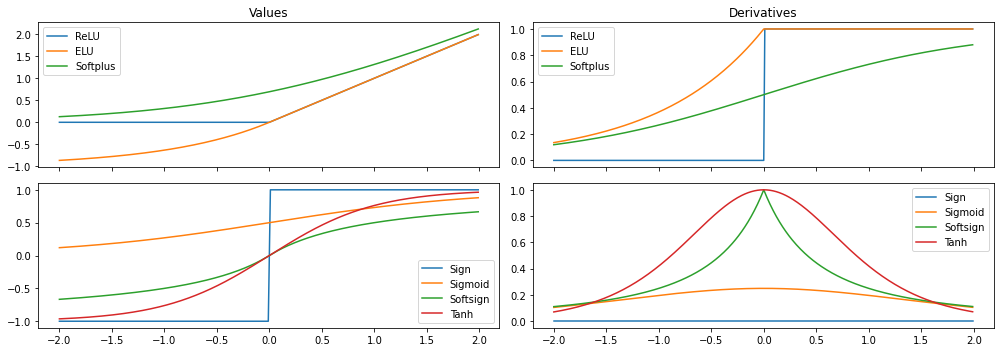

In [0]:
%matplotlib inline
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch

x = torch.arange(-2, 2, .01, requires_grad=True)
x_np = x.detach().numpy()
x.sum().backward() # to create x.grad

f, axes = plt.subplots(2, 2, sharex=True, figsize=(14, 5))
axes[0, 0].set_title('Values')
axes[0, 1].set_title('Derivatives')

for i, function_set in (0, (('ReLU', F.relu), ('ELU', F.elu), ('Softplus', F.softplus))), \
                       (1, (('Sign', torch.sign), ('Sigmoid', torch.sigmoid), ('Softsign', F.softsign), ('Tanh', torch.tanh))):
    for function_name, activation in function_set:
        ### BEGIN Solution
            # Setting the gradients to 0
            x.grad.zero_()
            # Calculating and plotting the activation function
            activ_func = activation(x).data.numpy()
            axes[i, 0].plot(x_np, activ_func, label=function_name)
            # Calculating and plotting the derivatives
            activation(x).sum().backward()
            grad_x = x.grad.data.numpy()
            axes[i, 1].plot(x_np, grad_x, label=function_name)
            # >>> your solution here <<<

        ### END Solution

    axes[i, 0].legend()
    axes[i, 1].legend()

plt.tight_layout()
plt.show()

### Task 1.2. MNIST classification. (4 points)

At the **[Seminar 13](https://github.com/adasegroup/ML2020_seminars/tree/master/seminar12)** on neural networks, we designed an MLP (Multilayer perceptron) with one hidden layer using our numpy implementations of linear layer, logistic and softmax activation functions. In this task, you are to

1. **(1 pt.)** Implement the MLP modules, including the Softmax cross entropy between `logits` and `labels`.
2. **(2 pt.)** Train our numpy realization of MLP to classify the MNIST from `sklearn.datasets()`. The required accuracy on validation is `> 90%`.
3. **(1 pt.)** Compare the acccuracy of classification to your scores from `Part 1` with and without dimensionality reduction. Is this comparison fair? :) Derive the confusion matrix for all digits classes. Which digits are predicted better or worse than others?

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [0]:
# fetch the dataset.
digits, targets = load_digits(return_X_y=True)
digits = digits.astype(np.float32) / 255

digits_train, digits_test, targets_train, targets_test = train_test_split(digits, targets, random_state=0)

train_size = digits_train.shape[0]

input_size = 8*8
classes_n = 10

**Implement the MLP with backprop.**

In [0]:
#Here you should implement by yourself MLP class and its constituents including forward and backward propagation methods

class Linear:
    def __init__(self, input_size, output_size):
        # Trainable parameters of the layer and their gradients
        self.thetas = np.random.randn(input_size, output_size) # the weight matrix of the layer (W)
        self.thetas_grads = np.empty_like(self.thetas) # gradient w.r.t. the weight matrix of the layer
        self.bias = np.random.randn(output_size) # bias terms of the layer (b)
        self.bias_grads = np.empty_like(self.bias) # gradient w.r.t. bias terms of the linear layer

    def forward(self, x): 
        output = np.matmul(x, self.thetas) + self.bias
        return output
    
    def backward(self, x, output_grad):
        """
        Calculate and return gradient of the loss w.r.t. the input of linear layer given the input x and the gradient 
        w.r.t output of linear layer. You should also calculate and update gradients of layer parameters.
        :param x: np.array, input tensor for linear layer;
        :param output_grad: np.array, grad tensor w.r.t output of linear layer;
        :return: np.array, grad w.r.t input of linear layer
        """
        
        ### BEGIN Solution
        # ... calculate grads
        # Calculating input gradients
        input_grad=np.matmul(self.thetas, output_grad)
        # Updating the gradients for biases and thetas
        self.bias_grads+=np.sum(output_grad, axis=1)
        self.thetas_grads+=np.matmul(x.reshape(-1, 1), output_grad.T)
        # >>> your solution here <<<
        
        ### END Solution
        return input_grad

class LogisticActivation:
    def __init__(self):
        # the layer has no parameters
        pass 
    
    def forward(self, x):
        output = 1/(1 + np.exp(-x))
        return output


    def backward(self, x, output_grad):
        """
        Calculate and return the gradient of the loss w.r.t. the input
        of logistic non-linearity (given input x and the gradient 
        w.r.t output of logistic non-linearity).
        
        :param x: np.array, input tensor for logistic non-linearity;
        :param output_grad: np.array, grad tensor w.r.t output of logistic non-linearity;
        :return: np.array, grad w.r.t input of logistic non-linearity
        
        """
        
        ### BEGIN Solution
        # An output of logistic function
        output = self.forward(x)
        # The gradient
        input_grad = output.reshape(-1, 1) * (1 - output.reshape(-1, 1)) * output_grad
        # >>> your solution here <<<
        ### END Solution
        return input_grad


class MLP:
    def __init__(self, input_size, hidden_layer_size, output_size):
        self.linear1 = Linear(input_size, hidden_layer_size)
        self.activation1 = LogisticActivation()
        self.linear2 = Linear(hidden_layer_size, output_size)
        
    def forward(self, x):
        return self.linear2.forward(self.activation1.forward(self.linear1.forward(x)))

    def backward(self, x, output_grad):
        """
        Calculate and return the gradient of the loss w.r.t. the input of MLP given the input and the gradient 
        w.r.t output of MLP. You should also update gradients of paramerters of MLP layers.
        Hint - you should chain backward operations of modules you have already implemented. You may also
        need to calculate intermediate forward results.
        
        :param x: np.array, input tensor for MLP;
        :param output_grad: np.array, grad tensor w.r.t output of MLP;
        :return: np.array, grad w.r.t input of MLP
        """
 
        ### BEGIN Solution
        lin1_forward = self.linear1.forward(x)
        activ_forward = self.activation1.forward(lin1_forward)
        return self.linear1.backward(x, self.activation1.backward(lin1_forward, self.linear2.backward(activ_forward, output_grad)))
        # >>> your solution here <<<
        ### END Solution

In [0]:
### BEGIN Solution
def softmax_crossentropy_with_logits(logits, reference_answers):
    # Softmax function
    softmax = np.exp(logits)/np.sum(np.exp(logits), axis=1, keepdims=True)
    # Cross-enthropy loss-function for the softmax
    cross_enthropy = -np.log(softmax[:, reference_answers])
    return cross_enthropy

def grad_softmax_crossentropy_with_logits(logits, reference_answers):
    # Softmax function
    softmax  =np.exp(logits)/np.sum(np.exp(logits), axis=1, keepdims=True)
    # Let's encode categorical values as a binary ones
    mult_cl_labs = np.zeros((logits.shape[0], logits.shape[1]))
    mult_cl_labs[np.array(range(logits.shape[0])), reference_answers]=1
    # Derivative of a cross-enthropy loss function for the softmax function
    grad_cross_enthropy = (softmax-mult_cl_labs).transpose()
    return grad_cross_enthropy
### END Solution

Starting epoch 0 , Accuracy on test:  0.06666666666666667

Starting epoch 10 , Accuracy on test:  0.6488888888888888

Starting epoch 20 , Accuracy on test:  0.8066666666666666

Starting epoch 30 , Accuracy on test:  0.8711111111111111

Starting epoch 40 , Accuracy on test:  0.8888888888888888

Starting epoch 50 , Accuracy on test:  0.9044444444444445

Starting epoch 60 , Accuracy on test:  0.9244444444444444

Starting epoch 70 , Accuracy on test:  0.9311111111111111

Starting epoch 80 , Accuracy on test:  0.9311111111111111

Starting epoch 90 , Accuracy on test:  0.9333333333333333



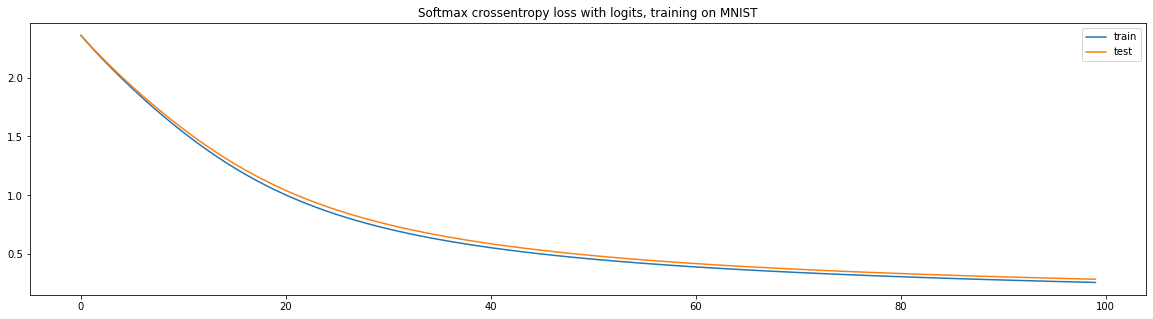

In [0]:
from sklearn.metrics import accuracy_score
np.random.seed(42)

mlp = MLP(input_size=input_size, hidden_layer_size=100, output_size=classes_n)

epochs_n = 100
learning_curve = [0] * epochs_n
test_curve = [0] * epochs_n

x_train = digits_train
x_test = digits_test
y_train = targets_train
y_test = targets_test

learning_rate = 1e-2

for epoch in range(epochs_n):
        
    for sample_i in range(train_size):
        x = x_train[sample_i].reshape((1, -1))
        target = np.array([y_train[sample_i]])

        ### BEGIN Solution
        # ... zero the gradients of the model
        mlp.linear1.thetas_grads=np.zeros(mlp.linear1.thetas_grads.shape)
        mlp.linear1.bias_grads=np.zeros(mlp.linear1.bias_grads.shape)
        mlp.linear2.thetas_grads=np.zeros(mlp.linear2.thetas_grads.shape)
        mlp.linear2.bias_grads=np.zeros(mlp.linear2.bias_grads.shape)
        # ... perform forward pass and compute the loss
        forward_pass = mlp.forward(x)
        cross_enthropy_loss = softmax_crossentropy_with_logits(forward_pass, target)
        # >>> your solution here <<<
        
        # ... compute the gradients w.r.t. the input of softmax layer
        grad_cr_ent_loss = grad_softmax_crossentropy_with_logits(forward_pass, target)
        # ... perform backward pass
        mlp.backward(x, grad_cr_ent_loss)
        # ... and update the weights with weight -= grad * learning_rate
        mlp.linear1.thetas-= mlp.linear1.thetas_grads*learning_rate
        mlp.linear1.bias-= mlp.linear1.bias_grads*learning_rate
        mlp.linear2.thetas-= mlp.linear2.thetas_grads*learning_rate
        mlp.linear2.bias-= mlp.linear2.bias_grads*learning_rate
        
        # >>> your solution here <<<

    if epoch % 10 == 0:
        forward_test   = mlp.forward(x_test)
        y_pred = np.argmax(forward_test, axis=1)
        acc = accuracy_score(y_test, y_pred)
        print('Starting epoch {}'.format(epoch),', Accuracy on test: ', acc)
        print()
    # Loss for the train curve
    forward_train = mlp.forward(x_train)
    Softmax = np.exp(forward_train)/np.sum(np.exp(forward_train), axis=1, keepdims=True)
    mult_cl_train = np.zeros(forward_train.shape)
    mult_cl_train[np.arange(y_train.shape[0]), y_train]=1
    train_loss = -np.sum(mult_cl_train*np.log(Softmax), axis=1)
    learning_curve[epoch] = np.mean(train_loss)
    # Loss for the test curve
    forward_test = mlp.forward(x_test)
    Softmax = np.exp(forward_test)/np.sum(np.exp(forward_test), axis=1, keepdims=True)
    mult_cl_test = np.zeros(forward_test.shape)
    mult_cl_test[np.arange(y_test.shape[0]), y_test]=1
    test_loss = -np.sum(mult_cl_test*np.log(Softmax), axis=1)
    test_curve[epoch] = np.mean(test_loss)   
plt.figure(figsize=(20, 5))
plt.plot(learning_curve)
plt.plot(test_curve)
plt.title("Softmax crossentropy loss with logits, training on MNIST")
plt.legend(['train', 'test'])
plt.show()     
    ### END Solution

In [0]:
# confusion matrix
# >>> your solution here <<<

,0,1,2,3,4,5,6,7,8,9
0,176,0,0,0,1,1,0,0,0,0
1,0,163,1,1,1,1,1,0,3,11
2,0,1,171,3,0,0,0,2,0,0
3,0,1,1,175,0,2,0,3,0,1
4,0,2,0,0,175,0,0,3,1,0
5,0,0,0,2,1,175,1,0,0,3
6,1,2,0,0,1,0,177,0,0,0
7,0,0,0,0,1,0,0,176,1,1
8,0,17,2,3,0,4,1,2,143,2
9,0,2,0,3,2,4,0,7,1,161


## Task 2. Autoencoders. (7 points)

### Task 2.1.  Autoencoder on the tabular data. (3 points)


We will build a latent representation for tabular data with simple Autoencoder (AE). We are going to work with the cancer dataset from scikit-learn package. You are to follow the instructions `1.0 - 1.6`.  

1. **(1 pt.)** Implement AE modules;
2. **(2 pt.)** Train AE to get latent representation of the cancer dataset from `sklearn.datasets()`. Use `MSE` loss and get < $0.28$ on validation, with AE "bottleneck" = $2$;
3. **(1 pt.)** Plot the latent representation of whole dataset in 2D, use colors to show object of differneet classes;

In [0]:
# imports
import sklearn.datasets as sk_data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn
import torch.utils.data as torch_data

#### 1.0 Featch the data. Scale it and split on train and test.

In [0]:
cancer_dset = sk_data.load_breast_cancer()

X = StandardScaler().fit_transform(cancer_dset['data'])

print('Features: ', list(cancer_dset['feature_names']))
print('\nShape:', X.shape)

X_train, X_val, y_train, y_val = train_test_split(X, cancer_dset['target'], test_size=0.2, random_state=42)
print('\nTrain size: ', len(X_train))
print('Validation size: ', len(X_val))

Features:  ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']

Shape: (569, 30)

Train size:  455
Validation size:  114


#### 1.1 Let us firtly create the dataset, which we'll be able to use with pytorch dataloader. 
Implement `__len__` and `__getitem__` methods.

In [0]:
class CancerData(torch_data.Dataset):
    def __init__(self, X, y):
        super(CancerData, self).__init__()
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    
    def __len__(self):
        return len(self.X) # >>> your solution here <<<
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx] # >>> your solution here <<<

In [0]:
train_dset = CancerData(X_train, y_train) 
val_dset = CancerData(X_val, y_val) 

print(train_dset[5])

(tensor([ 0.1172,  1.9199,  0.1961,  0.0111,  1.2482,  1.0453,  0.9429,  0.6376,
         1.7940,  1.1302, -0.1269, -0.3336,  0.0064, -0.1713, -0.4780,  0.9458,
         0.5145, -0.1454, -0.2388,  0.6321,  0.2466,  1.8650,  0.5016,  0.1101,
         1.5532,  2.5664,  2.0649,  0.8617,  2.1310,  2.7793]), tensor(0.))


#### 1.2 Now, we'll make a base class for our autoencoder. 
AE takes as input encoder and decoder (it will be two neural networks). Your task is to implement the forward pass.

In [0]:
class MyFirstAE(nn.Module):
    def __init__(self, encoder, decoder):
        super(MyFirstAE, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
    
    def forward(self, x):
        """
        Take a mini-batch as an input, encode it to the latent space and decode back to the original space
        x_out = decoder(encoder(x))
        :param x: torch.tensor, (MB, x_dim)
        :return: torch.tensor, (MB, x_dim)
        """
        return self.decoder(self.encoder(x)) # >>> your solution here <<<

#### 1.3 It is high time to create encoder an decoder neural networks!
Make hidden size of the network to be equal to `2`.

**Hint.** You can use `nn.Sequential` to create your own archtectures.

In [0]:
torch.manual_seed(2)
print('Input size of encoder:', train_dset[5][0].shape[0])
encoder = nn.Sequential(
                        nn.Linear(30, 20),
                        nn.ReLU(),
                        nn.Linear(20, 10),
                        nn.ReLU(),
                        nn.Linear(10, 2)
                        )  

decoder = nn.Sequential(
                        nn.Linear(2, 10),
                        nn.ReLU(),
                        nn.Linear(10, 20),
                        nn.ReLU(),
                        nn.Linear(20, 30)
                        )

Input size of encoder: 30


In [0]:
if torch.cuda.is_available():
  device = torch.device('cuda:0')
else:
  device = torch.device('cpu')

net = MyFirstAE(encoder, decoder)
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(net.parameters(), lr=10**(-2), weight_decay=10**(-4))
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=40 , gamma=0.4)

train_loader = torch_data.DataLoader(train_dset, batch_size=50, shuffle=True) 
val_loader = torch_data.DataLoader(val_dset, batch_size=200, shuffle=False) 

#### 1.4 Implement the missing parts of the `train` function

In [0]:
def train(epochs, net, criterion, optimizer, train_loader, val_loader,scheduler=None, verbose=True, save_dir=None):
    net.to(device)
    for epoch in range(1, epochs+1):
        net.train()
        for X, _ in train_loader:
            # Perform one step of minibatch stochastic gradient descent          
            X = X.to(device)
            output = net(X)
            loss = criterion(output, X)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        # define NN evaluation, i.e. turn off dropouts, batchnorms, etc.
        net.eval()
        for X, _ in val_loader:
            # Compute the validation loss
            X = X.to(device)
            output = net(X)
            val_loss = criterion(output, X)         
        if scheduler is not None:
            scheduler.step()
        freq = max(epochs//20,1)
        if verbose and epoch%freq==0:
            print('Epoch {}/{} || Loss:  Train {:.4f} | Validation {:.4f}'.format(epoch, epochs, loss.item(), val_loss.item()))

#### 1.5 Train your AE on breast cancer dataset. 
Your goal is to get validation error <0.3.

Some features that may help you to improve the performance:
* `Dropout`
* `Batchnorm`
* lr scheduler
* Batch size increase/decrease

In [0]:
# for `MSE` loss get < 0.28 on validation, with AE "bottleneck" = 2
train(100, net, criterion, optimizer, train_loader, val_loader, scheduler) 

Epoch 5/100 || Loss:  Train 0.2433 | Validation 0.4869
Epoch 10/100 || Loss:  Train 0.3797 | Validation 0.3745
Epoch 15/100 || Loss:  Train 0.3818 | Validation 0.3178
Epoch 20/100 || Loss:  Train 0.5031 | Validation 0.3082
Epoch 25/100 || Loss:  Train 0.3230 | Validation 0.3097
Epoch 30/100 || Loss:  Train 0.2098 | Validation 0.3004
Epoch 35/100 || Loss:  Train 0.4678 | Validation 0.3014
Epoch 40/100 || Loss:  Train 0.3092 | Validation 0.3037
Epoch 45/100 || Loss:  Train 0.2220 | Validation 0.2927
Epoch 50/100 || Loss:  Train 0.3509 | Validation 0.2905
Epoch 55/100 || Loss:  Train 0.3415 | Validation 0.2895
Epoch 60/100 || Loss:  Train 0.2977 | Validation 0.2934
Epoch 65/100 || Loss:  Train 0.2114 | Validation 0.2870
Epoch 70/100 || Loss:  Train 0.2523 | Validation 0.3023
Epoch 75/100 || Loss:  Train 0.2400 | Validation 0.2889
Epoch 80/100 || Loss:  Train 0.3087 | Validation 0.2856
Epoch 85/100 || Loss:  Train 0.2752 | Validation 0.2862
Epoch 90/100 || Loss:  Train 0.4962 | Validation 

#### 1.6 Let us take a look at the latent space. 
Encode the whole dataset, using your AE, plot it in 2D and use colors to indicate objects of differrent classes

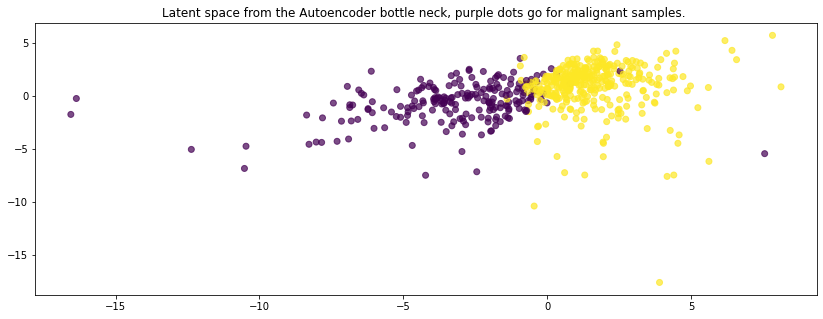

In [0]:
 ### BEGIN Solution
net.eval()
plt.figure(figsize=(14, 5))
enc = net.encoder((CancerData(X, cancer_dset['target']))[:][0].to(device)).cpu().detach().numpy()
plt.scatter(enc[:,0], enc[:,1], c=cancer_dset['target'], alpha=0.7);
plt.title('Latent space from the Autoencoder bottle neck, purple dots go for malignant samples.');
 ### END Solution

### Task 2.2.  Autoencoder on kMNIST. (4 points)


We will build a latent representation for `kMRIST` dataset by using our AE. We will work with the data from `Part 1`.

1. **(2 pt.)** Train AE to get latent representation of the `kMNIST` dataset from `sklearn.datasets()`. Follow the instructions `2.0 - 2.4`. Use `MSE` loss and obtain < $0.035$ on validation, with AE "bottleneck"  $\leq 40$;
2. **(1 pt.)** Plot 10 images and their reconstructions. Plot the latent representation of the whole dataset in 3D, compare visually to your manifold from `Part 1` and upload (pictures) screenshots to this notebook.
3. **(1 pt.)** Get the classification accuracy for the latent features. Use the `KNN` classifier with any hyperparameters you like. Write a couple of sentences about the differences of `manifold learning` and ` AE` results. 
3. **(BONUS 3 pt.)** Sampling from latent representation.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
def load(f):
    return np.load(f)['arr_0']

# Load the data
x_train = load('data/kmnist/kmnist-train-imgs.npz')
x_test = load('data/kmnist/kmnist-test-imgs.npz')
y_train = load('data/kmnist/kmnist-train-labels.npz')
y_test = load('data/kmnist/kmnist-test-labels.npz')

# Reshape the data and scale
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)
x_train = MinMaxScaler().fit_transform(x_train)
x_test = MinMaxScaler().fit_transform(x_test)

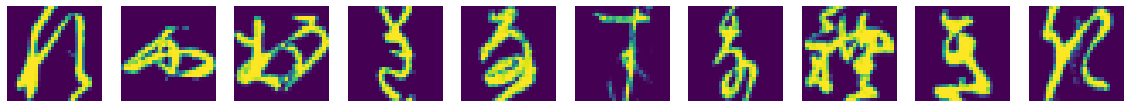

In [0]:
fig, ax = plt.subplots(ncols=10, figsize=(20, 5))
for i in range(10):
    ax[i].imshow(x_train[i].reshape(28,28));
    ax[i].axis('off')

In [0]:
class kMNISTData(torch_data.Dataset):
    def __init__(self, X, y):
        super(kMNISTData, self).__init__()
        self.X = torch.tensor(X, dtype=torch.float32)                                                        
        self.y = torch.tensor(y, dtype=torch.float32)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [0]:
train_kmnist = kMNISTData(x_train, y_train) ### YOUR CODE HERE ###
test_kmnist = kMNISTData(x_test, y_test) ### YOUR CODE HERE ###

#### 2.0 Create encoder and decoder network for kMNIST. 
You can either use convolutions or flatten the images and use linear layers. You can choose hidden size (not larger than 40) and any architecture you like.

In [0]:
torch.manual_seed(2)
encoder = nn.Sequential(
                        # Linear layer
                        nn.Linear(784, 392),
                        # Flattening an image to 1D dimension
                        nn.BatchNorm1d(392),
                        nn.ReLU(),
                        # Second linear layer
                        nn.Linear(392, 40)
                        ) 
decoder =  nn.Sequential(
                        nn.Linear(40, 392),
                        nn.BatchNorm1d(392),
                        nn.ReLU(),
                        nn.Linear(392, 784)
                        ) 

#### 2.1 Train AE on the kMNIST. 
Your goal is to obtain MSE on the test set < $0.035$ on `MyFirstAE(encoder(40), decoder(40))`.

In [0]:
if torch.cuda.is_available():
  device = torch.device('cuda:0')
else:
  device = torch.device('cpu')

net = MyFirstAE(encoder, decoder) 
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(net.parameters(), lr=10**(-2), weight_decay=10**(-4))
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=40 , gamma=0.4)

train_loader = torch_data.DataLoader(train_kmnist, batch_size=500, shuffle=True) 
val_loader = torch_data.DataLoader(test_kmnist, batch_size=500, shuffle=False) 

In [0]:
epochs = 20
train(epochs, net, criterion, optimizer, train_loader, val_loader, scheduler)

Epoch 1/20 || Loss:  Train 0.0537 | Validation 0.0561
Epoch 2/20 || Loss:  Train 0.0402 | Validation 0.0433
Epoch 3/20 || Loss:  Train 0.0345 | Validation 0.0380
Epoch 4/20 || Loss:  Train 0.0319 | Validation 0.0357
Epoch 5/20 || Loss:  Train 0.0305 | Validation 0.0343
Epoch 6/20 || Loss:  Train 0.0298 | Validation 0.0333
Epoch 7/20 || Loss:  Train 0.0289 | Validation 0.0327
Epoch 8/20 || Loss:  Train 0.0278 | Validation 0.0317
Epoch 9/20 || Loss:  Train 0.0272 | Validation 0.0309
Epoch 10/20 || Loss:  Train 0.0269 | Validation 0.0307
Epoch 11/20 || Loss:  Train 0.0260 | Validation 0.0299
Epoch 12/20 || Loss:  Train 0.0262 | Validation 0.0297
Epoch 13/20 || Loss:  Train 0.0272 | Validation 0.0290
Epoch 14/20 || Loss:  Train 0.0251 | Validation 0.0288
Epoch 15/20 || Loss:  Train 0.0251 | Validation 0.0284
Epoch 16/20 || Loss:  Train 0.0234 | Validation 0.0284
Epoch 17/20 || Loss:  Train 0.0239 | Validation 0.0282
Epoch 18/20 || Loss:  Train 0.0245 | Validation 0.0275
Epoch 19/20 || Loss

#### 2.2 Plot any 10 images and their reconstructions.

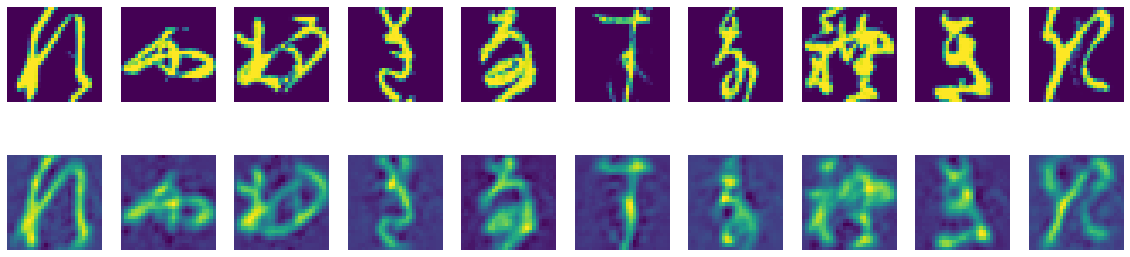

In [0]:
net.eval()
fig, ax = plt.subplots(ncols=10, nrows=2, figsize=(20, 5))
for i in range(10):
    im = train_kmnist[i][0]
    rec = net(im[None,...].to(device)).cpu().detach()
    ax[0, i].imshow(im.reshape(28,28));
    ax[1, i].imshow(rec.reshape(28,28));
    ax[0, i].axis('off')
    ax[1, i].axis('off')

#### 2.3 Plot the latent representation of whole dataset in 3D, compare visually to your manifold from `Part 1` and upload (pictures) screenshoots to this notebook.

In [0]:
### BEGIN Solution

# >>> your solution here <<<

### END Solution

#### 2.4 Get the classification accuracy for the latest features. Use the `KNN` classifier with any hyperparameters you'll choose. Write a couple of sentences comparing the results of `manifold learning` and ` AE`. 

In [0]:
### BEGIN Solution
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
clf = KNeighborsClassifier(n_neighbors=6, n_jobs=-1)
X_train = net.encoder(train_kmnist[:][0].to(device)).cpu().detach()
clf.fit(X_train, train_kmnist[:][1])
X_test = net.encoder(test_kmnist[:][0].to(device)).cpu().detach()
print('Classification accuracy for the latest features = ', clf.score(X_test, test_kmnist[:][1]))
### END Solution

Classification accuracy for the latest features =  0.9344


I did not implement the part with accuracy for manifold learning, but from the results provided (e.g 0.974 for Isomap and 0.933 for PCA) we can conclude, that we did not gain much of accuracy. It is almost the same.

### BONUS: Sampling from latent space. (3 points)

Imagine, that you want to generate images, using you AE. To do that, you need to sample from the latent space and then decode the result. Of course, we do not know the exact distribution of the latent space. Therefore, let us assume that latent space distribution is Gaussian:

* Encode all the training images into the latent space
* Calculate mean and covariance matrix ($\mu$ and $\Sigma$)
* Sample  $z$ from the $\mathcal{N}(\mu, \Sigma)$
* Decode $z$ from the previous step to obtain an image

Using the procedure described above, sample 10 images and plot them (they should be similar to those of the initial dataset)

Text(0.5, 1.0, 'Sampling from latent space')

<Figure size 1800x720 with 0 Axes>

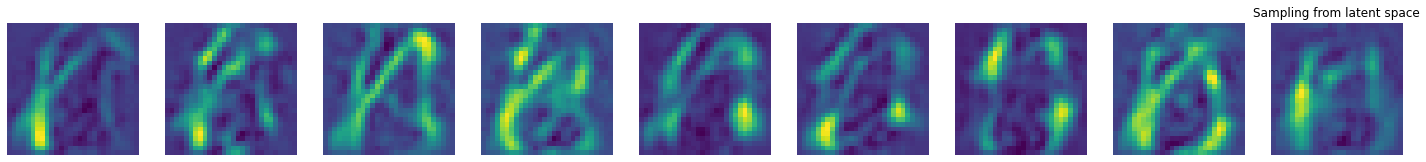

In [0]:
### BEGIN Solution
# Encoding images into the latent space
images_encoded = net.encoder(train_kmnist[:][0].to(device)).cpu().detach()
# Calculate mean
mean = [images_encoded[:, i].mean() for i in np.arange(images_encoded.shape[1])]
# Calculate covariance
covarience_matrix = np.cov(images_encoded.T)
plt.figure(figsize=(25,10))
# Sampling from the destribution
random_samples = np.random.multivariate_normal(images_encoded[0], covarience_matrix, 10)
# Decoding from the previous step to obtain an image
rs_decoded = net.decoder(torch.tensor(random_samples, dtype=torch.float32).to(device)).cpu().detach()
plt.figure(figsize=(25,10))
for i in range(1,10):
    plt.subplot(1,9,i)
    plt.imshow(rs_decoded[i].reshape(28,28))
    plt.axis('off')
### END Solution

**Yeah, so you can get more than `100%` for the homework, good luck!**